# Bigram Name Generator

In [2]:
# Download names.txt from github
import requests
from pathlib import Path

# Set up a data folder
data_path = Path("data/")

if data_path.is_dir():
    print(f"{data_path}/ already exists... skipping")
else:
    print(f"{data_path}/ does not exist, creating one...")
    data_path.mkdir(parents=True, exist_ok=True)

# Download data
with open(data_path / "names.txt", "wb") as f:
    request = requests.get("https://raw.githubusercontent.com/karpathy/makemore/master/names.txt")
    f.write(request.content)


data/ already exists... skipping


In [59]:
import torch
import matplotlib.pyplot as plt

# Open names.txt and turn it into a list of names with '.' as the start and end character
with open(data_path / "names.txt", "r") as f:
    names = ["."+line.strip()+"." for line in f.readlines()]

# Create bigrams from all the names
bigrams = []
for name in names:
    name_bigram = [(f,s) for f, s in zip(name[:], name[1:])]
    for bigram in name_bigram:
        bigrams.append(bigram)

# Create mappings for char's to int's and vice versa
char_set = {char for name in names for char in name}
ctoi = {c: i for i, c in enumerate(sorted(list(char_set)))}
itoc = {i: c for i, c in enumerate(sorted(list(char_set)))}

# Record the amount of occurances of each char following another char
occurances = torch.zeros(len(char_set), len(char_set), dtype=float)
for bigram in bigrams:
    ix1, ix2 = bigram
    ix1, ix2 = ctoi[ix1], ctoi[ix2]
    occurances[ix1][ix2] +=1


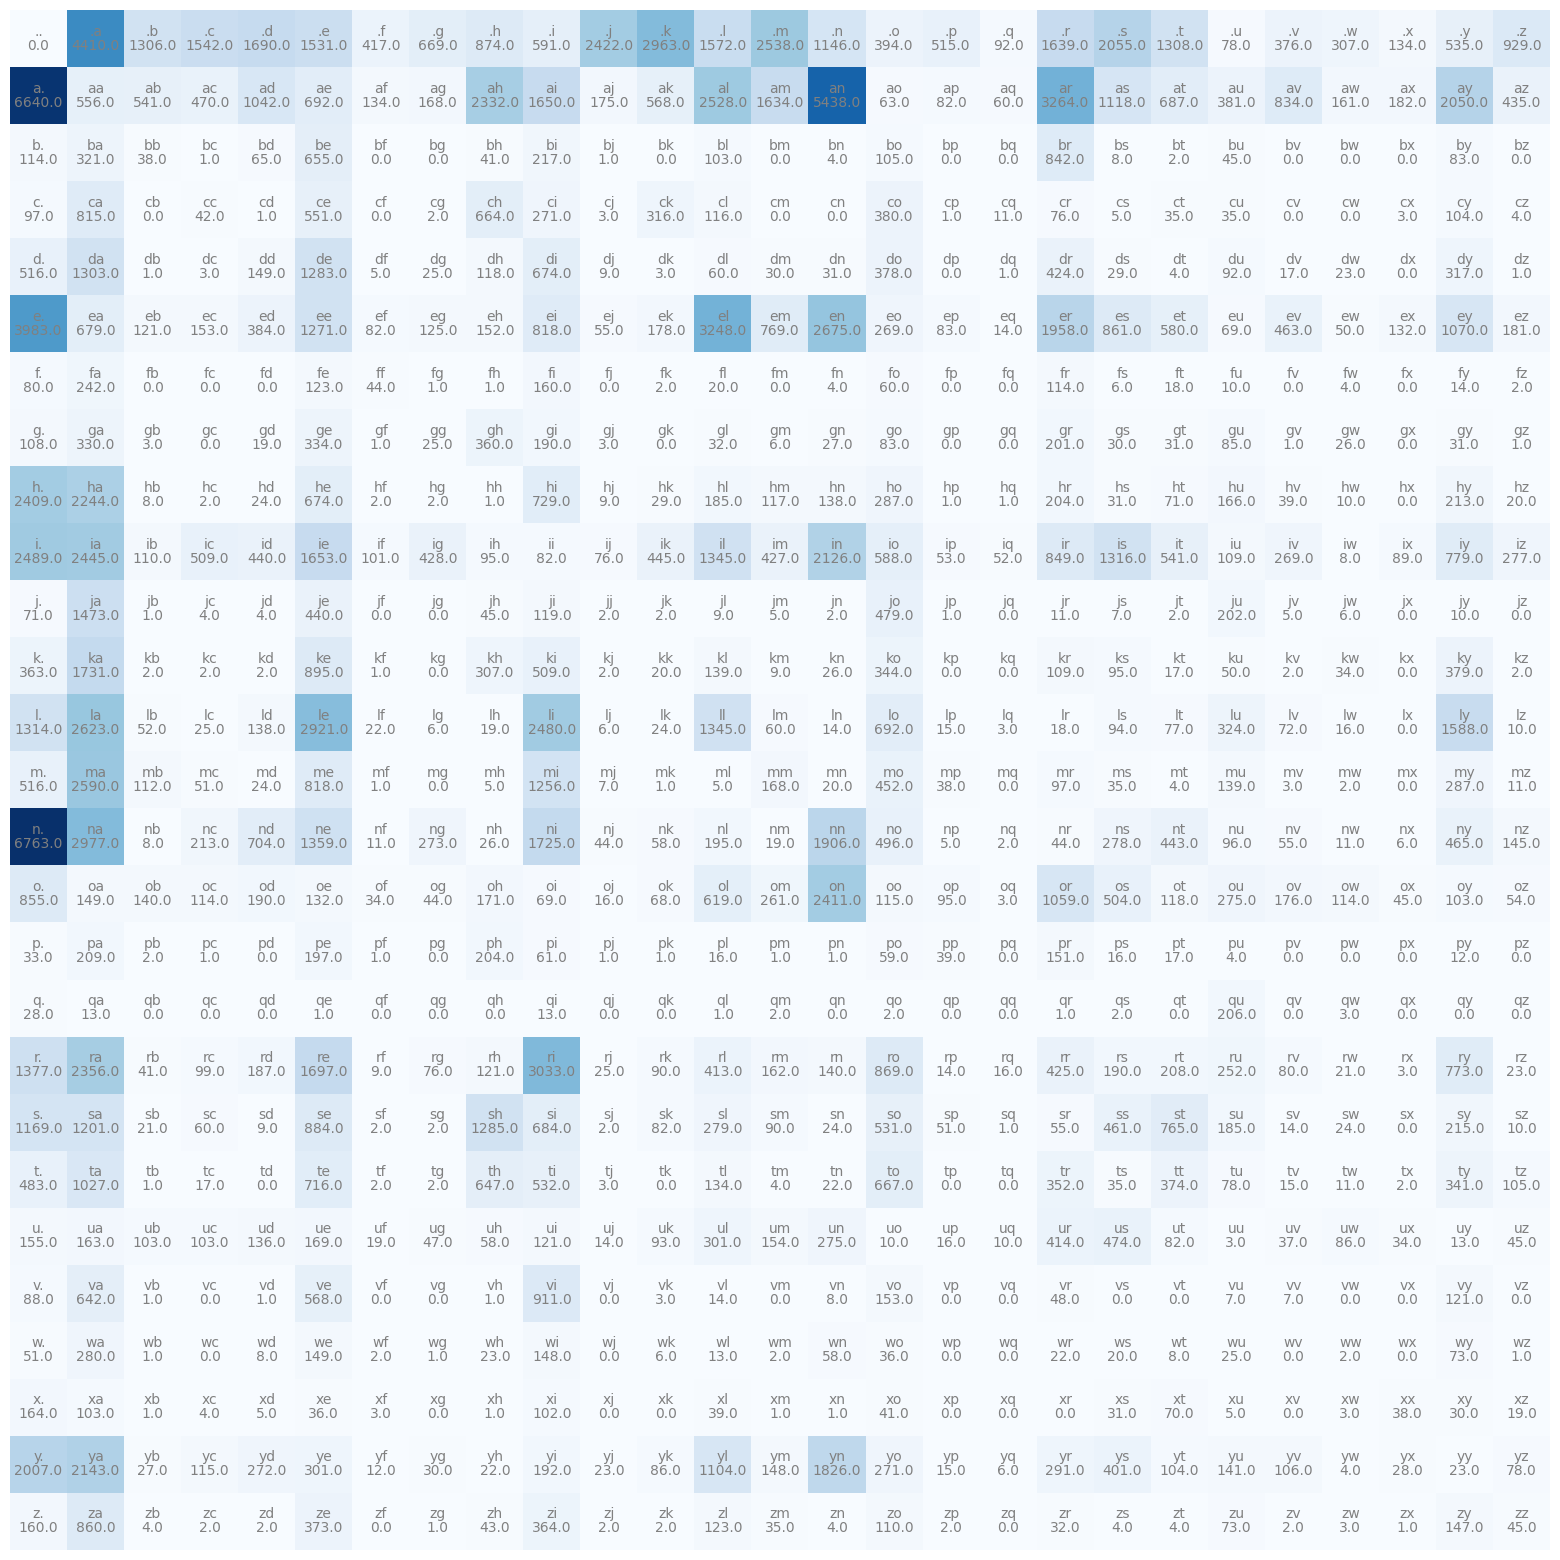

In [60]:
plt.figure(figsize=(20,20))
plt.imshow(occurances, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itoc[i] + itoc[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, occurances[i,j].item(), ha="center", va="top", color="gray")
plt.axis("off");

In [167]:
# Use torch.multinomial to sample from a row's probability distribution
RAND_SEED = 2697
g = torch.Generator().manual_seed(RAND_SEED)
p = occurances[0]/occurances[0].sum()
names = []
for _ in range(10):
    idx = 0
    name = ""
    while True:
        p = occurances[idx]/occurances[idx].sum()
        idx = torch.multinomial(input=p, num_samples=1, replacement=True, generator=g).item()
        letter = itoc[idx]
        name += letter
        if idx == 0:
            names.append(name)
            break
print(names)

['dennd.', 'ke.', 'beyle.', 'ashost.', 'ce.', 'juldade.', 'ckandit.', 'zua.', 'acahletol.', 'pahalllyni.']
